<a href="https://colab.research.google.com/github/ChristophWuersch/AppliedNeuralNetworks/blob/main/ANN02/MyFirstPyTorchNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="Bilder/ost_logo.png" width="240" align="right"/>
<div style="text-align: left"> <b> Applied Neural Networks | FS 2025 </b><br>
<a href="mailto:christoph.wuersch@ost.ch"> © Christoph Würsch </a> </div>
<a href="https://www.ost.ch/de/forschung-und-dienstleistungen/technik/systemtechnik/ice-institut-fuer-computational-engineering/"> Eastern Switzerland University of Applied Sciences OST | ICE </a>

# Mehrschicht-Perzeptron (MLP) für den Wisconsin Breast Cancer Datensatz

In diesem Jupyter-Notebook wird ein vollständiges Beispiel zur Implementierung eines MLP-Modells für die binäre Klassifikation auf dem Wisconsin Breast Cancer Datensatz vorgestellt. Jeder Schritt wird ausführlich erklärt und mit Codebeispielen ergänzt.

## 1. Notwendige Bibliotheken importieren
Zuerst müssen die notwendigen Bibliotheken importiert werden, die für Datenmanipulation, Modelltraining und Visualisierung benötigt werden.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Warum werden diese Bibliotheken benötigt?
1. **`torch`**: Die Hauptbibliothek von PyTorch wird für alle grundlegenden Tensoroperationen und die Implementierung neuronaler Netze verwendet.
   - Beispiel: Tensoren erstellen, Operationen durchführen und Daten auf GPU verschieben.

2. **`torch.nn`**: Dieses Modul enthält vorgefertigte Schichten und Funktionen zur Erstellung neuronaler Netze.
   - Beispiel: `nn.Linear`, `nn.ReLU` für vollverbundene Schichten und Aktivierungsfunktionen.

3. **`torch.optim`**: Enthält Optimierungsalgorithmen wie `SGD`, `Adam` usw., die für die Anpassung der Modellparameter während des Trainings verwendet werden.
   - Beispiel: `optim.Adam` zur Aktualisierung der Gewichte basierend auf den Gradienten.

4. **`torch.utils.data`**: Enthält `Dataset` und `DataLoader`, um große Datensätze effizient zu handhaben und in Batches zu laden.
   - Beispiel: `DataLoader` für das Laden von Daten in zufälliger Reihenfolge mit der gewünschten Batch-Größe.

5. **`sklearn.datasets`**: Die Funktion `load_breast_cancer` stellt den Datensatz zur Verfügung, der in diesem Beispiel verwendet wird.
   - Beispiel: Laden eines vorgefertigten Datensatzes zur Klassifikation von Tumoren.

6. **`sklearn.model_selection`**: Mit `train_test_split` wird der Datensatz in Trainings- und Testmengen aufgeteilt.
   - Beispiel: `train_test_split(X, y)` zum Aufteilen der Daten in 80% Training und 20% Test.

7. **`sklearn.preprocessing`**: Der `StandardScaler` wird verwendet, um die Daten zu normalisieren, was für ein stabiles und schnelles Training erforderlich ist.
   - Beispiel: Skalieren der Eingabedaten auf Mittelwert 0 und Standardabweichung 1.

8. **`matplotlib.pyplot`**: Diese Bibliothek wird verwendet, um Trainings- und Validierungskurven zu visualisieren.
   - Beispiel: Plotten der Verlustkurve über die Epochen mit `plt.plot()`.

## 2. Daten vorbereiten und Laden
Der Wisconsin Breast Cancer Datensatz wird geladen und in Trainings- und Testdaten aufgeteilt. Die Merkmale werden normalisiert, um das Training zu stabilisieren.

In [3]:
# Laden des Datensatzes
data = load_breast_cancer()
X, y = data.data, data.target  # Merkmale und Zielvariablen

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisieren der Daten
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konvertieren in PyTorch-Tensoren
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Ziel muss (N, 1) sein
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

### Was bedeuten die Merkmale und Zielvariablen?
- **Merkmale ($X$):** Diese repräsentieren verschiedene physikalische Eigenschaften der Tumore, die im Datensatz enthalten sind. Beispiele für solche Eigenschaften sind:
  - Radius (Mittelwert, Extremwert)
  - Textur (Standardabweichung der Grauwertintensitäten)
  - Glätte (Gleichmäßigkeit der Zellen)
  - Kompaktheit
  - Symmetrie
  - Fraktale Dimension
  Jede dieser Eigenschaften wird numerisch dargestellt und hilft dabei, Muster zwischen gutartigen (benignen) und bösartigen (malignen) Tumoren zu erkennen.

- **Zielvariablen ($y$):** Diese stellen die Klassifikation des Tumors dar:
  - `0`: Gutartig (benign)
  - `1`: Bösartig (malign)
  Ziel des Modells ist es, basierend auf den Merkmalen vorherzusagen, ob ein Tumor bösartig oder gutartig ist.

### Warum ist die Normalisierung wichtig?
Die Normalisierung ist besonders für neuronale Netze wichtig, da sie dafür sorgt, dass die Merkmale des Datensatzes vergleichbare Wertebereiche haben. Ohne Normalisierung könnten Merkmale mit größeren Werten die Gradienten während des Trainings dominieren, was zu einer instabilen oder ineffizienten Optimierung führen kann.

`StandardScaler` normalisiert die Daten nach der Formel:

$$ z = \frac{x - \mu}{\sigma} $$

Hierbei sind:
- $x$: Der ursprüngliche Wert eines Merkmals.
- $\mu$: Der Mittelwert des Merkmals.
- $\sigma$: Die Standardabweichung des Merkmals.

Das Ergebnis ist ein Datensatz, bei dem jedes Merkmal einen Mittelwert von 0 und eine Standardabweichung von 1 hat. Dies hilft dem Optimierer, schneller zu konvergieren und stabilere Gradienten zu gewährleisten.

## 3. Erzeugen eines Datasets und eines DataLoaders
Die Daten werden in PyTorch-kompatiblen `Dataset`- und `DataLoader`-Objekten organisiert, um das Laden von Batches zu erleichtern.

In [11]:
# Dataset erstellen
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader erstellen
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## 4. Modell-Klasse definieren: `model()`
Ein einfaches MLP mit zwei versteckten Schichten wird erstellt. Die Ausgabe wird durch die Sigmoid-Funktion skaliert, da es sich um eine binäre Klassifikation handelt.

In [12]:
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Modell initialisieren
input_size = X_train.shape[1]
model = BinaryClassifier(input_size)


Die `nn.Sequential`-Klasse in PyTorch ist eine praktische Möglichkeit, neuronale Netzwerke schnell und kompakt zu definieren, insbesondere für Architekturen, bei denen die Schichten sequentiell angeordnet sind. Sie ermöglicht es, mehrere Schichten in der Reihenfolge ihrer Anwendung zu definieren. Die `nn.Sequential`-Klasse nimmt eine geordnete Liste von Modulen (Schichten) als Eingabe, die dann in der angegebenen Reihenfolge auf die Eingabedaten angewendet werden. Jede Schicht muss eine `nn.Module`-Subklasse sein.

1. Die Eingabedaten durchlaufen nacheinander jede Schicht, wie sie in `nn.Sequential` definiert ist.
2. Die Ausgabe einer Schicht wird zur Eingabe der nächsten Schicht.
3. Am Ende gibt das Modell das Ergebnis der letzten Schicht zurück.

#### Vorteile der `nn.Sequential`-Klasse
1. **Einfachheit**: Die Definition eines Modells ist kompakt und leserlich, besonders für einfache Architekturen.
2. **Lesbarkeit**: Es ist leicht zu erkennen, wie die Schichten in einem Modell angeordnet sind.
3. **Schnelles Prototyping**: Ideal für einfache, sequentielle Netzwerke, ohne zusätzliche Logik.
4. **Weniger Boilerplate-Code**: Kein explizites Schreiben einer `forward`-Methode erforderlich, da `nn.Sequential` automatisch die Reihenfolge der Schichten verarbeitet.

#### Nachteile der `nn.Sequential`-Klasse

1. **Eingeschränkte Flexibilität**:
   - Komplexere Architekturen, die Verzweigungen, Skip Connections (z. B. in ResNet) oder mehrere Eingaben/Ausgaben benötigen, können nicht mit `nn.Sequential` implementiert werden.
   - Beispiel: Residual Blocks erfordern benutzerdefinierte Logik.

   ```python
   class ResidualBlock(nn.Module):
       def __init__(self, in_features):
           super().__init__()
           self.block = nn.Sequential(
               nn.Linear(in_features, in_features),
               nn.ReLU(),
               nn.Linear(in_features, in_features)
           )

       def forward(self, x):
           return x + self.block(x)  # Skip Connection
   ```

2. **Keine benutzerdefinierte Logik**:
   - Wenn individuelle Schichten spezifisches Verhalten benötigen (z. B. verschiedene Pfade basierend auf Bedingungen), ist `nn.Sequential` ungeeignet.

3. **Fehlende Schichtbenennung**:
   - In `nn.Sequential` sind die Schichten standardmäßig durchnummeriert (z. B. `0`, `1`, `2`).
   - Für bessere Nachvollziehbarkeit ist es manchmal hilfreich, Schichten manuell zu benennen.
     ```python
     model = nn.Sequential(
         ('fc1', nn.Linear(10, 32)),
         ('activation', nn.ReLU()),
         ('fc2', nn.Linear(32, 1))
     )
     ```
Die `nn.Sequential`-Klasse ist ideal für einfache Modelle mit einer klaren, linearen Schichtanordnung. Für komplexe Architekturen mit Verzweigungen, Skip Connections oder benutzerdefinierter Logik ist jedoch eine explizite Subklasse von `nn.Module` besser geeignet.


In [13]:
# Modell mit nn.Sequential definieren
model2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),  # Erste versteckte Schicht
    nn.ReLU(),                       # Aktivierungsfunktion
    nn.Linear(32, 16),               # Zweite versteckte Schicht
    nn.ReLU(),                       # Aktivierungsfunktion
    nn.Linear(16, 1),                # Ausgabe-Schicht
    nn.Sigmoid()                     # Sigmoid für binäre Klassifikation
)

## 5. Loss-Funktion (criterium), Metrik und Optimierer definieren
Die Binary Cross Entropy Loss (BCE) wird verwendet. Diese wird wie folgt definiert:

$$ L(\hat{y}, y) = -\frac{1}{N} \sum_{i=1}^{N} \big(y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)\big) $$

Zusätzlich verwenden wir den Adam-Optimierer.

In [14]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

Das **Gradientenabstiegsverfahren** ist ein grundlegendes Optimierungsverfahren, das in maschinellem Lernen verwendet wird, um die Parameter eines Modells zu aktualisieren und die Verlustfunktion zu minimieren. Der Adam-Optimierer ist eine erweiterte Variante des Gradientenabstiegs, die adaptives Lernen ermöglicht und in vielen Anwendungen bevorzugt wird. Das Ziel des Gradientenabstiegs ist es, eine Verlustfunktion $\mathcal{L}(\mathbf{w})$ zu minimieren, die von den Modellparametern $\mathbf{w}$ abhängt. Die grundlegende Lernregel lautet:

$$ \mathbf{w} \leftarrow \mathbf{w} - \eta \nabla_{\mathbf{w}} \mathcal{L}(\mathbf{w}) $$

### Erklärungen:
1. **Parameter $\mathbf{w}$:**
   - Dies sind die Variablen (z. B. Gewichte und Biases), die im Modell angepasst werden.

2. **Gradient $\nabla_{\mathbf{w}} \mathcal{L}(\mathbf{w})$:**
   - Der Gradient der Verlustfunktion $\mathcal{L}$ nach den Parametern $\mathbf{w}$ gibt die Richtung des steilsten Anstiegs der Verlustfunktion an.
   - Durch die Subtraktion des Gradienten bewegen wir uns in die Richtung des steilsten Abstiegs.

3. **Lernrate $\eta$ (Learning Rate):**
   - Ein hyperparametrischer Faktor, der bestimmt, wie groß die Schritte bei der Aktualisierung der Parameter sind.
   - Wenn $\eta$ zu groß ist, kann der Algorithmus instabil werden oder über das Minimum hinaus schwingen.
   - Wenn $\eta$ zu klein ist, kann das Training langsam konvergieren oder in lokalen Minima hängen bleiben.

**Ablauf**
1. Initialisiere die Parameter $\mathbf{w}$ zufällig.
2. Berechne den Gradient $\nabla_{\mathbf{w}} \mathcal{L}(\mathbf{w})$ basierend auf den Trainingsdaten.
3. Aktualisiere die Parameter gemäß der Lernregel.
4. Wiederhole die Schritte, bis die Verlustfunktion ein Minimum erreicht.

Der Adam-Optimierer (Adaptive Moment Estimation) ist eine verbesserte Variante des Gradientenabstiegs. Er kombiniert die Vorteile von zwei anderen Optimierungsverfahren:
1. **Momentum**: Beschleunigt die Konvergenz durch die Berücksichtigung vorheriger Gradienten.
2. **RMSProp**: Skaliert die Lernrate adaptiv basierend auf der Größe der Gradienten.

Die Adam-Formel aktualisiert die Parameter wie folgt:
1. **Berechnung des Gradienten:**
   $$ g_t = \nabla_{\mathbf{w}} \mathcal{L}(\mathbf{w}) $$

2. **Erster Moment (mittlerer Gradient):** $\beta_1$ ist der Vergessensfaktor für den Mittelwert (typisch $\beta_1 = 0.9$).
   $$ m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t $$

3. **Zweiter Moment (mittlere quadratische Größe):** $\beta_2$ ist der Vergessensfaktor für die Varianz (typisch $\beta_2 = 0.999$).
   $$ v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 $$

4. **Bias-Korrektur:** Diese Korrektur wird durchgeführt, da die Momente am Anfang unterschätzt werden.
   $$ \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} $$
   
5. **Parameteraktualisierung:** $\epsilon$ ist ein kleiner Wert (z. B. $10^{-8}$), um Division durch Null zu vermeiden.
   $$ \mathbf{w} \leftarrow \mathbf{w} - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} $$

**Vorteile des Adam-Optimierers**
1. **Adaptives Lernen:** Die Lernrate wird für jeden Parameter individuell skaliert.
2. **Stabilität:** Kombiniert die Vorteile von Momentum und RMSProp.
3. **Effizient:** Funktioniert gut auf großen Datensätzen und in hohen Dimensionen.
4. **Geringer Hyperparameter-Aufwand:** Standardwerte ($\beta_1 = 0.9$, $\beta_2 = 0.999$, $\epsilon = 10^{-8}$) funktionieren oft gut.

**Nachteile des Adam-Optimierers**
1. **Überanpassung:** Kann in einigen Fällen zu stark an die Trainingsdaten angepasst sein.
2. **Schlechte Generalisierung:** Führt manchmal zu schlechteren Testergebnissen im Vergleich zu einfacheren Optimierern wie SGD.
3. **Rechenaufwand:** Erfordert mehr Speicher und Rechenzeit als simpler SGD.



## 6. Trainings-Loop
Der Trainings-Loop iteriert über die Trainingsdaten, berechnet den Loss und aktualisiert die Modellparameter.

In [15]:
num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        # Nullsetzen der Gradienten
        optimizer.zero_grad()

        # Vorwärtsdurchlauf
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Rückwärtsdurchlauf und Optimierung
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Verlust: {epoch_loss:.4f}")

Epoch [1/20], Verlust: 0.6728
Epoch [2/20], Verlust: 0.5986
Epoch [3/20], Verlust: 0.5094
Epoch [4/20], Verlust: 0.4244
Epoch [5/20], Verlust: 0.3427
Epoch [6/20], Verlust: 0.2707
Epoch [7/20], Verlust: 0.2061
Epoch [8/20], Verlust: 0.1671
Epoch [9/20], Verlust: 0.1365
Epoch [10/20], Verlust: 0.1099
Epoch [11/20], Verlust: 0.1006
Epoch [12/20], Verlust: 0.0937
Epoch [13/20], Verlust: 0.0854
Epoch [14/20], Verlust: 0.0747
Epoch [15/20], Verlust: 0.0704
Epoch [16/20], Verlust: 0.0689
Epoch [17/20], Verlust: 0.0645
Epoch [18/20], Verlust: 0.0591
Epoch [19/20], Verlust: 0.0585
Epoch [20/20], Verlust: 0.0546


## 7. Validierungs-Loop
Nach jedem Trainingsepoch wird das Modell auf den Testdaten evaluiert. Die Genauigkeit wird berechnet als:

$$ \text{Accuracy} = \frac{\text{Anzahl korrekter Vorhersagen}}{\text{Gesamtanzahl der Beispiele}} $$

In [16]:
model.eval()
test_losses = []
accuracies = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        test_losses.append(loss.item())

        predicted = (outputs >= 0.5).float()
        correct = (predicted == y_batch).sum().item()
        accuracy = correct / y_batch.size(0)
        accuracies.append(accuracy)

mean_test_loss = sum(test_losses) / len(test_losses)
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"Testverlust: {mean_test_loss:.4f}, Genauigkeit: {mean_accuracy:.4f}")

Testverlust: 0.0617, Genauigkeit: 0.9783


### Warum ist der Evaluierungsmodus notwendig?
Der Evaluierungsmodus wird mit `model.eval()` aktiviert und hat zwei Hauptzwecke:

1. **Deaktivierung von Dropout und Batch Normalization:** Während des Trainings können Mechanismen wie Dropout oder Batch Normalization verwendet werden, um die Generalisierung zu verbessern. Diese Verhaltensweisen sind im Evaluierungsmodus deaktiviert, da sie während der Inferenz nicht benötigt werden. Das sorgt für konsistente und deterministische Vorhersagen.

2. **Optimierung der Leistung:** Durch das Deaktivieren von Gradientenberechnungen (`torch.no_grad()`), das üblicherweise in Verbindung mit `eval()` verwendet wird, wird die Berechnung effizienter und speicherschonender.

Zusammenfassend sorgt der Evaluierungsmodus dafür, dass das Modell im Testmodus korrekte Vorhersagen liefert, ohne unnötige Trainings-spezifische Mechanismen oder zusätzliche Speicheranforderungen.

## 8. Modell speichern und Validierungskurven plotten
Das trainierte Modell wird gespeichert, und die Trainingsverluste werden visualisiert.

Modell gespeichert.


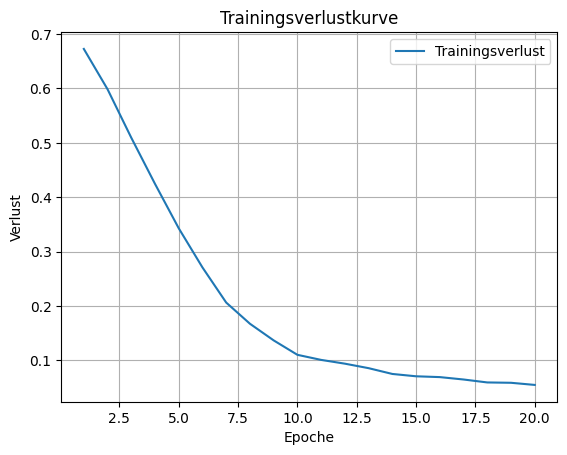

In [17]:
# Modell speichern
torch.save(model.state_dict(), "binary_classifier.pth")
print("Modell gespeichert.")

# Verlustkurven plotten
plt.plot(range(1, num_epochs + 1), train_losses, label='Trainingsverlust')
plt.xlabel('Epoche')
plt.ylabel('Verlust')
plt.title('Trainingsverlustkurve')
plt.legend()
plt.grid(True)
plt.show()